# The Grammar of Graphics
If you want to type along with me, use [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata271_sp25&branch=main&urlpath=tree%2Fdata271_sp25%2Flectures%2Fdata271_lec17_live.ipynb) instead. 
If you don't want to type and want to follow along just by executing the cells, stay in this notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import midwest
import warnings 
warnings.filterwarnings('ignore') 

**NOTE** If you get errors when you run the cell above, go to the terminal and type the following
```python
pip install plotnine
pip install matplotlib==3.8.3
```

Then come back to this notebook and try again. (You might have to restart your kernel). 

In [2]:
df = midwest
df

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU


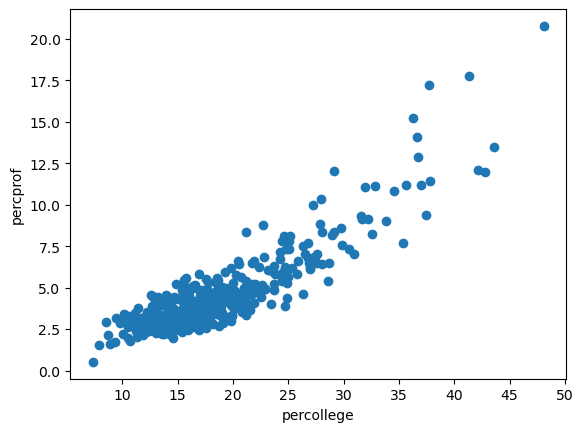

In [3]:
# Visualize the relationship between the percent who went to college, and the percent who got a professional degree
# With matplotlib
plt.scatter('percollege','percprof',data = df)
plt.xlabel('percollege')
plt.ylabel('percprof')
plt.show()

In [4]:
# Do the same with a plotnine ggplot
ggplot?

Init signature: ggplot(data: 'Optional[DataLike]' = None, mapping: 'Optional[aes]' = None)
Docstring:     
Create a new ggplot object

Parameters
----------
data :
    Default data for plot. Every layer that does not
    have data of its own will use this one.
mapping :
    Default aesthetics mapping for the plot. These will be used
    by all layers unless specifically overridden.

Notes
-----
ggplot object only have partial support for pickling. The mappings used
by pickled objects should not reference variables in the namespace.
File:           /opt/homebrew/Caskroom/miniforge/base/envs/data271/lib/python3.13/site-packages/plotnine/ggplot.py
Type:           type
Subclasses:     

The rest of the plotnine documentation is [here](https://plotnine.org/reference/) (including examples). 

In [5]:
# Do the same with a plotnine ggplot
print(ggplot(df, aes(x='percollege',y='percprof'))+geom_point())

<ggplot: (640 x 480)>


Does the relationship vary by state? Let's make each state a different color.

In [6]:
# Do this with matplotlib
df.state.unique()

<StringArray>
['IL', 'IN', 'MI', 'OH', 'WI']
Length: 5, dtype: str

In [7]:
# Separate our data
IL = df[df.state == 'IL']
IN = df[df.state == 'IN']
MI = df[df.state == 'MI']
OH = df[df.state == 'OH']
WI = df[df.state == 'WI']

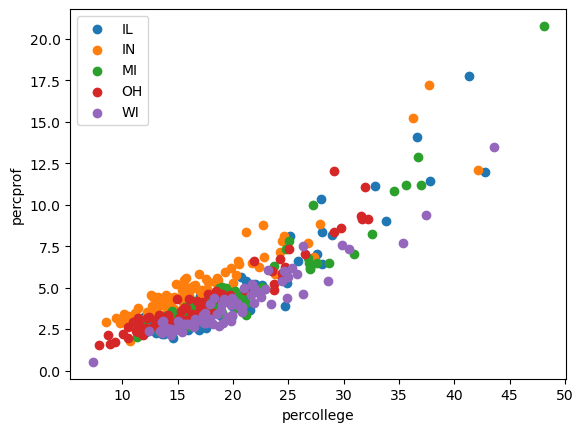

In [8]:
# Create our scatter plots
plt.scatter('percollege','percprof',data = IL,label='IL')
plt.scatter('percollege','percprof',data = IN,label='IN')
plt.scatter('percollege','percprof',data = MI,label='MI')
plt.scatter('percollege','percprof',data = OH,label='OH')
plt.scatter('percollege','percprof',data = WI,label='WI')
plt.xlabel('percollege')
plt.ylabel('percprof')
plt.legend()
plt.show()

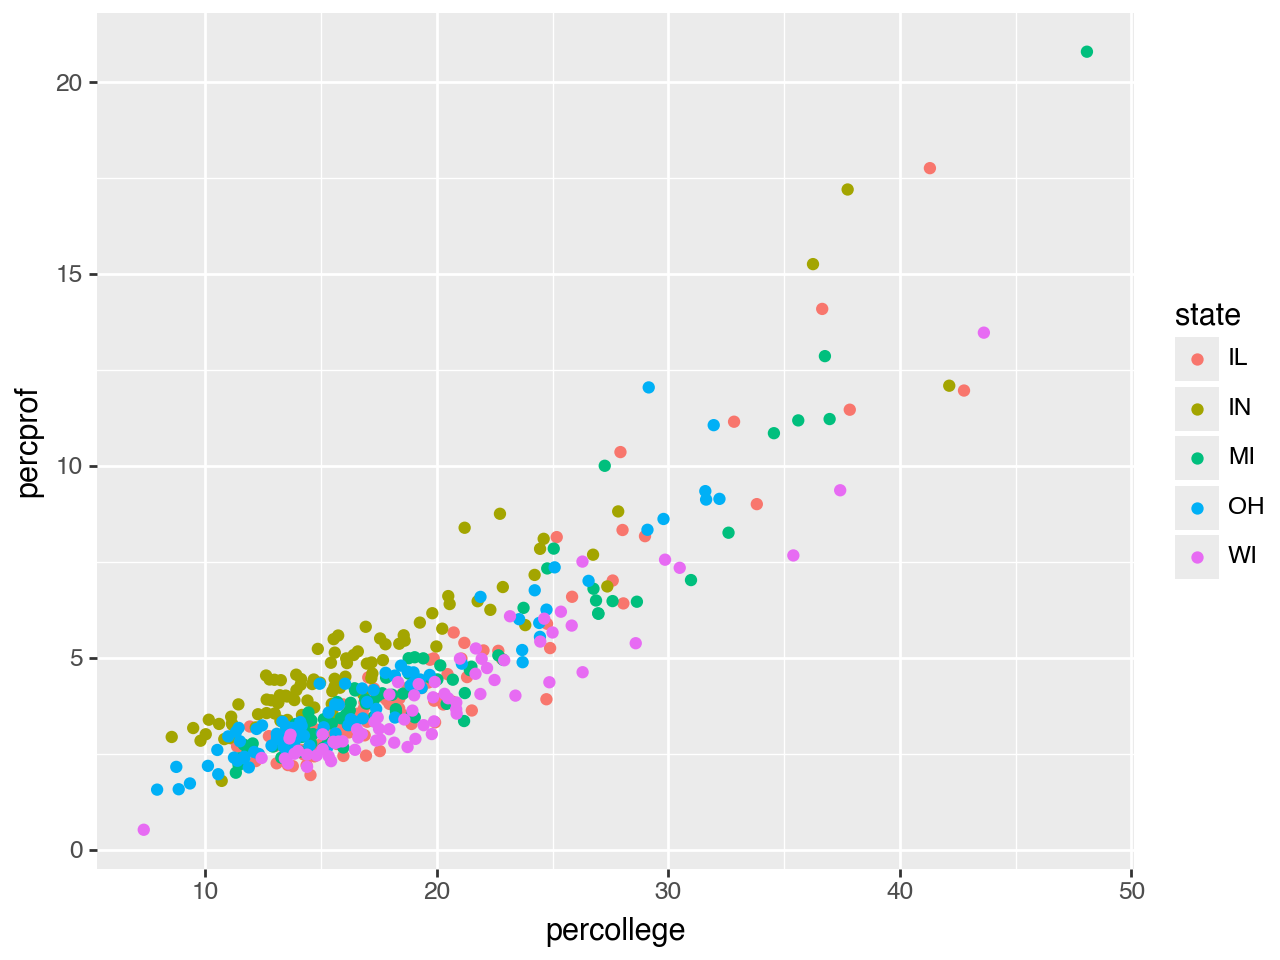

In [9]:
# do the same thing with a plotnine ggplot
(ggplot(df, aes('percollege','percprof',color = 'state'))
+geom_point())

These are all on top of eachother. Let's split up the visulazations

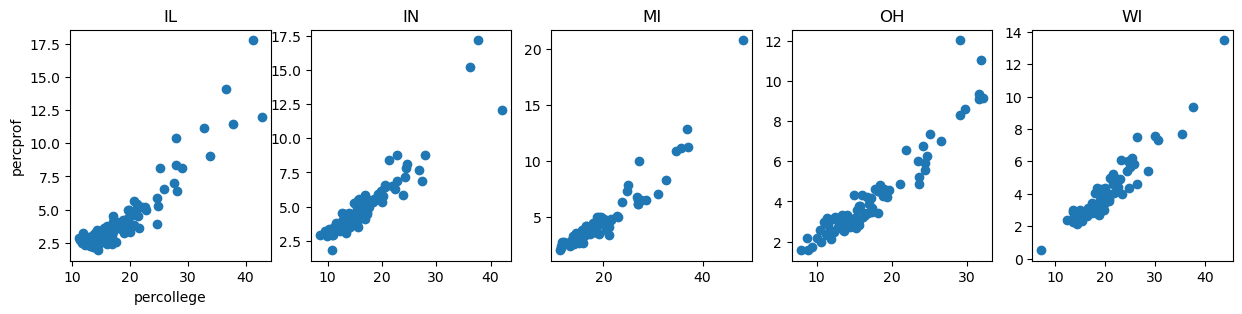

In [10]:
# with matplotlib
fig, ax = plt.subplots(1,5,figsize = (15,3))
ax[0].scatter('percollege','percprof',data = IL)
ax[0].set_title('IL')
ax[1].scatter('percollege','percprof',data = IN)
ax[1].set_title('IN')
ax[2].scatter('percollege','percprof',data = MI)
ax[2].set_title('MI')
ax[3].scatter('percollege','percprof',data = OH)
ax[3].set_title('OH')
ax[4].scatter('percollege','percprof',data = WI)
ax[4].set_title('WI')
ax[0].set_xlabel('percollege')
ax[0].set_ylabel('percprof')
plt.show()

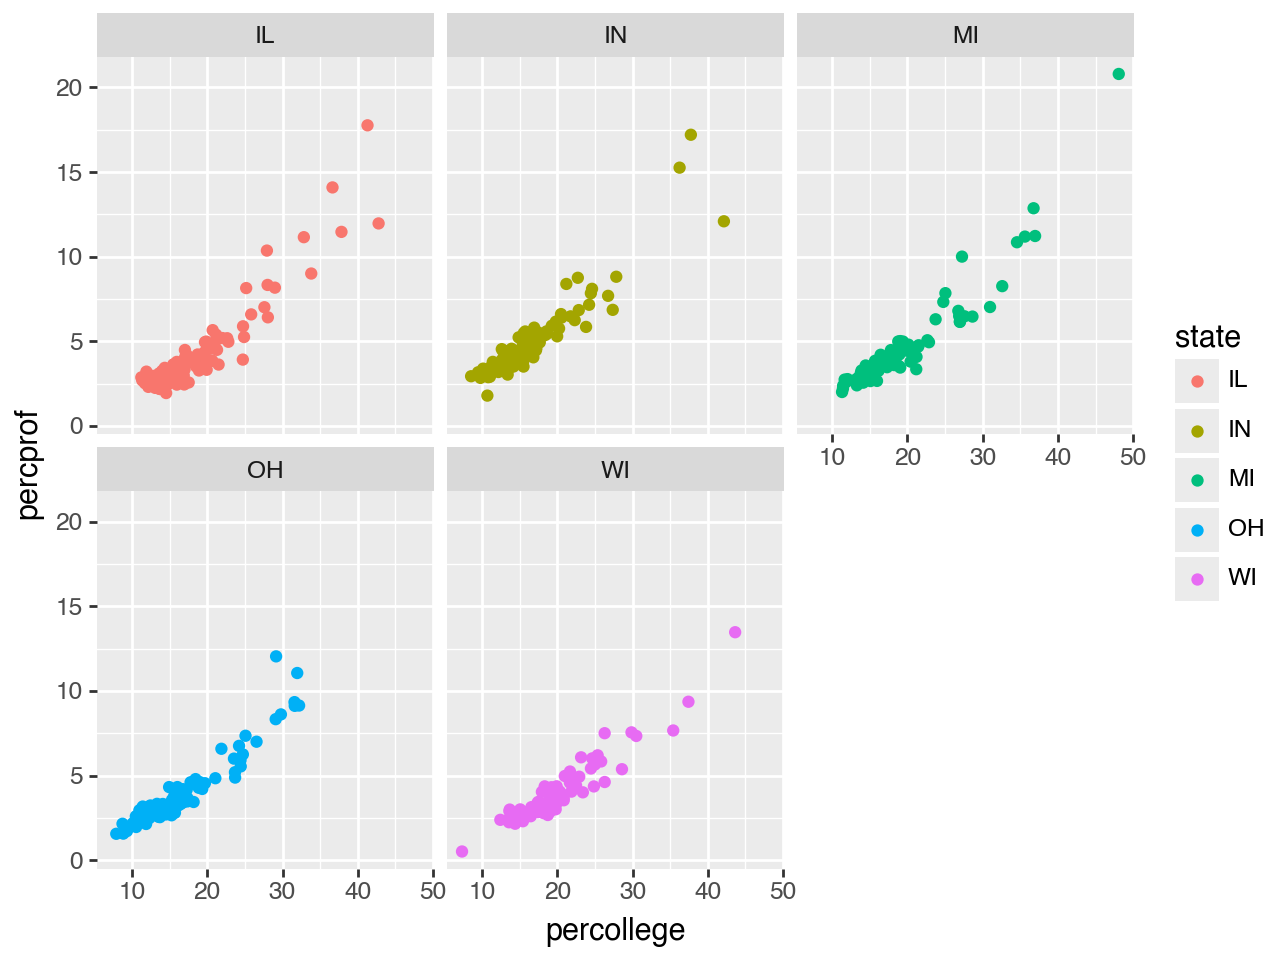

In [11]:
# with a plotnine ggplot
(ggplot(df,aes('percollege','percprof',color = 'state'))
+geom_point()
+facet_wrap('state'))

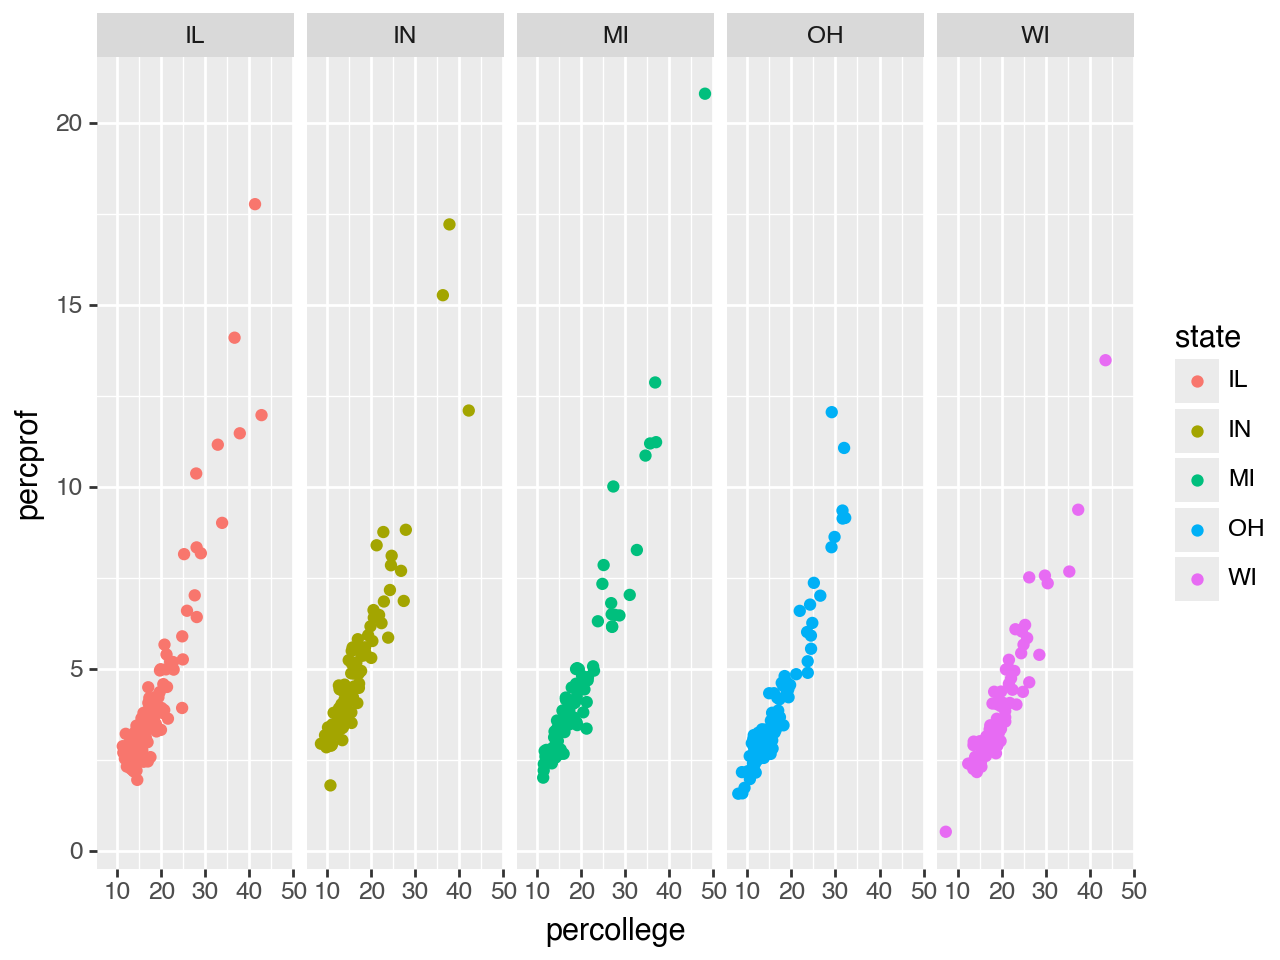

In [12]:
(ggplot(df,aes('percollege','percprof',color = 'state'))
+geom_point()
+facet_wrap('state',ncol=5))

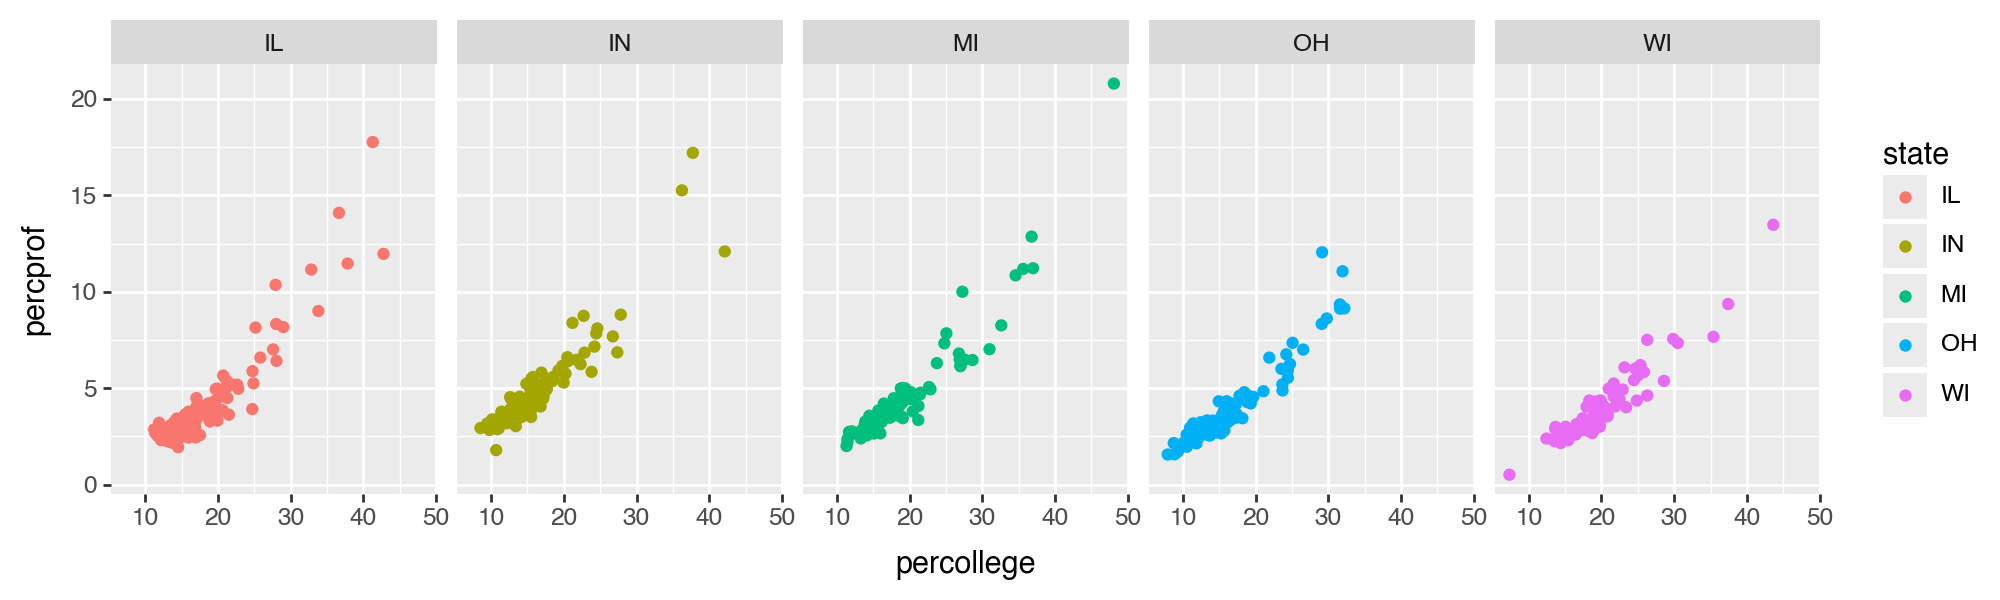

In [13]:
(ggplot(df,aes('percollege','percprof',color = 'state'))
+geom_point()
+facet_wrap('state',ncol=5)
+ theme(figure_size=(10, 3)))

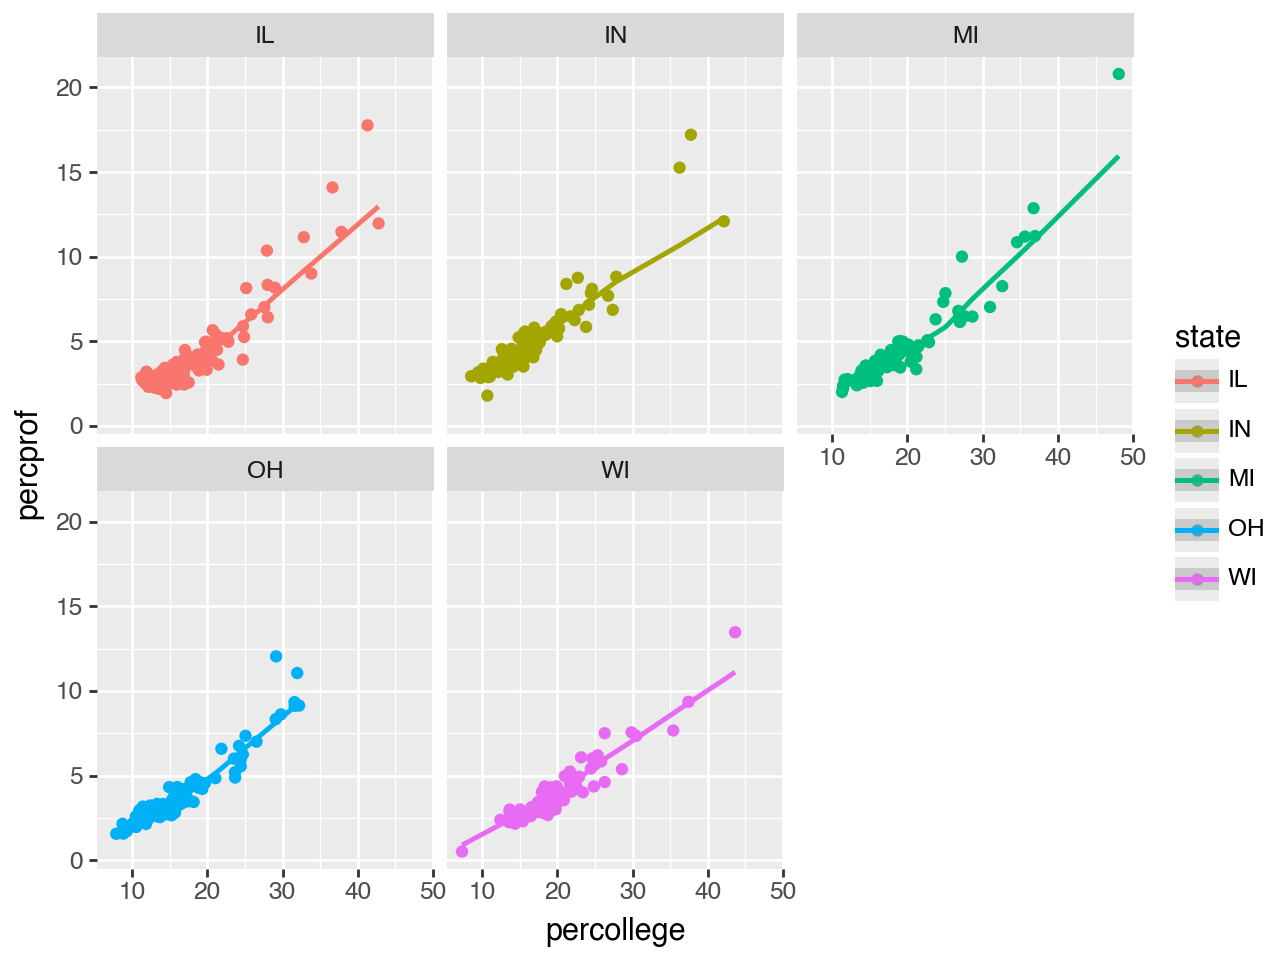

In [14]:
# add statistical transformations
(ggplot(df,aes('percollege','percprof',color = 'state'))
+geom_point()
+facet_wrap('state')
+stat_smooth())

What if we wanted to visualize the number of counties in each state.

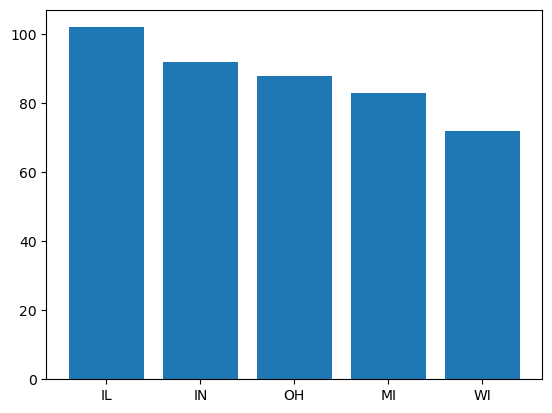

In [15]:
# with matplotlib 
counties_per_state = df.state.value_counts()
plt.bar(counties_per_state.index, counties_per_state.values)
plt.show()

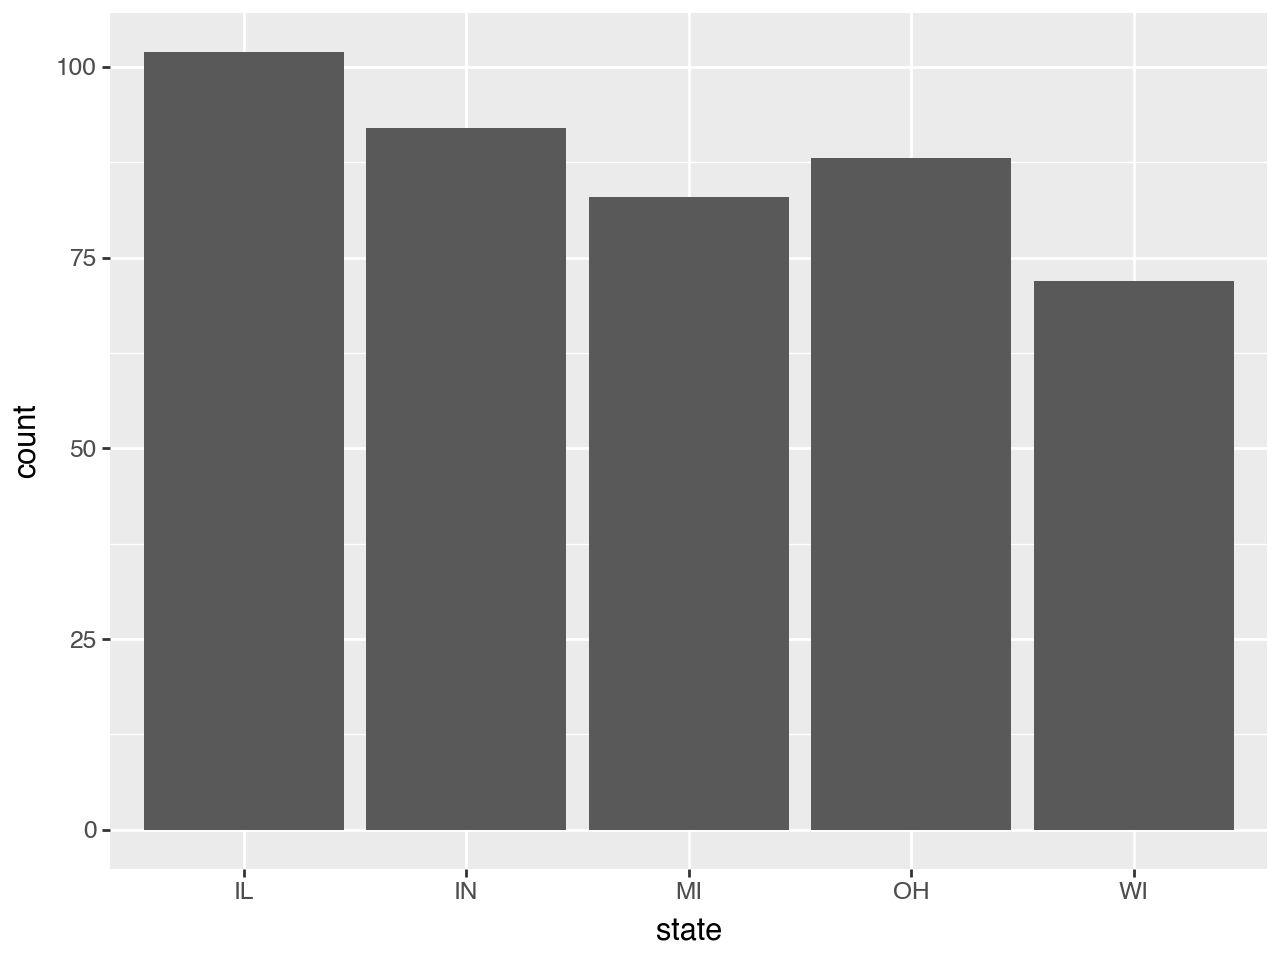

In [16]:
# with ggplot
(ggplot(df,aes(x='state'))
+geom_bar())